In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

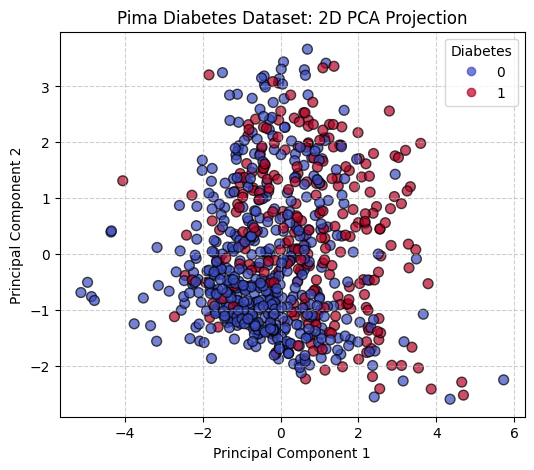

Variance explained by these two components: 47.82%


In [27]:
# 1. Load the Pima Diabetes Dataset
# Note: You can download this CSV or load via sklearn if available
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=columns)

X = data.drop('class', axis=1).values
y = data['class'].values

# 2. Preprocessing: PCA requires centered and scaled data
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply PCA to reduce 8 features to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plotting
fig, ax = plt.subplots(figsize=(6, 5))

# Plot samples by color
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], s=50, c=y, cmap='coolwarm', edgecolors="k", alpha=0.7)

# Legend and Labels
ax.legend(*scatter.legend_elements(), loc="upper right", title="Diabetes")
ax.set_title("Pima Diabetes Dataset: 2D PCA Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Quick check on how much info we kept
print(f"Variance explained by these two components: {np.sum(pca.explained_variance_ratio_):.2%}")

In [30]:
def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # 1. Create a Pipeline that does PCA THEN SVM
    # This allows the 'estimator' to handle 8 features, while plotting in 2D
    clf_pipeline = Pipeline([
        ('pca', PCA(n_components=2)),
        ('svm', svm.SVC(kernel=kernel, gamma=0.5))
    ])
    
    # Train on the original 8-feature data
    clf_pipeline.fit(X_scaled, y)

    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))
    
    # Use PCA coordinates for the plot limits
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # 2. To plot boundaries, we must pass the 2D version of the model 
    # so DecisionBoundaryDisplay can "see" a 2-feature input.
    # We cheat slightly by training a "visual-only" model on the PCA points.
    visual_clf = svm.SVC(kernel=kernel, gamma=0.5).fit(X_pca, y)

    common_params = {"estimator": visual_clf, "X": X_pca, "ax": ax}
    
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
        cmap='coolwarm'
    )
    
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Note: Support vectors here are in the 2D PCA space
        ax.scatter(
            visual_clf.support_vectors_[:, 0],
            visual_clf.support_vectors_[:, 1],
            s=100,
            facecolors="none",
            edgecolors="k",
            label="Support Vectors"
        )

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, edgecolors="k", cmap='coolwarm')
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Diabetes")
    
    title = f"SVC ({kernel}) trained on 8 features\nProjected to 2D PCA Space"
    ax.set_title(title if long_title else kernel)

    return ax

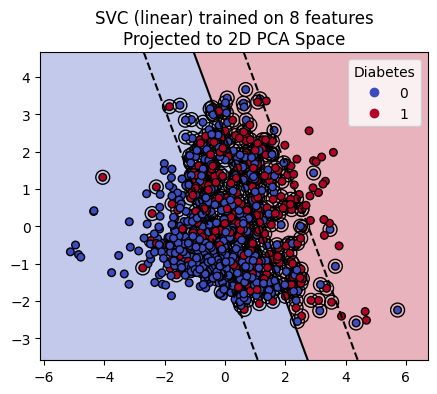

In [31]:
# Call the function
plot_training_data_with_decision_boundary("linear")
plt.show()

<Axes: title={'center': 'SVC (poly) trained on 8 features\nProjected to 2D PCA Space'}>

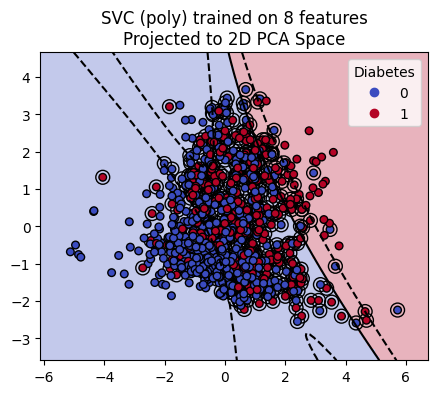

In [32]:
plot_training_data_with_decision_boundary("poly")

<Axes: title={'center': 'SVC (rbf) trained on 8 features\nProjected to 2D PCA Space'}>

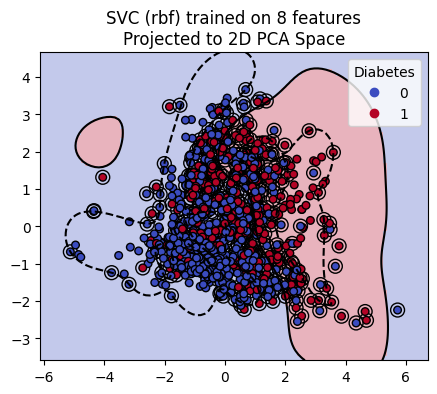

In [33]:
plot_training_data_with_decision_boundary("rbf")

<Axes: title={'center': 'SVC (sigmoid) trained on 8 features\nProjected to 2D PCA Space'}>

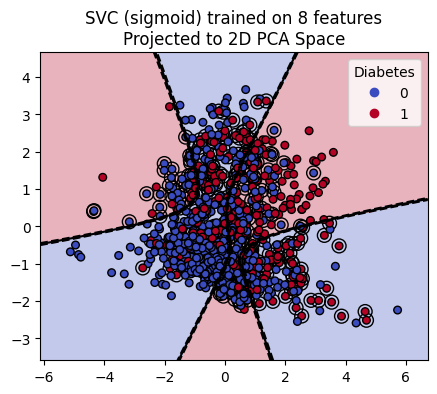

In [34]:
plot_training_data_with_decision_boundary("sigmoid")